In [27]:
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy import  lambdify, Matrix 
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
A,alpha,B,x,h,P,u_0 = sp.symbols('A,alpha,B,x,h,P,u_0')
# Assumed Solution
u = A * sp.exp(alpha * x) + B * sp.exp(-alpha * x)
print('Assumed solution')
displayEquations('AS',u)
# Finding the Valid Assumed solution by pluggin in the BC's
bc1 = u.subs({x:1}) - 100
bc2 = u.diff(x).subs({x:0}) - h*P*u_0
print('Applying following BC\'s')
displayEquations('u(0)',bc1)
displayEquations("u'(0)",bc2)

Assumed solution


<IPython.core.display.Math object>

Applying following BC's


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
C,b,z = Matrix([[sp.exp(alpha),sp.exp(-alpha)],[alpha,-alpha]]),Matrix([A,B]),Matrix([100,P*h*u_0])
C_inv = C.inv()
j = C_inv*z
displayEquations(b,j)

<IPython.core.display.Math object>

In [29]:
# solving for A, B
dof = linsolve([bc1,bc2],[A,B])
(a_sol,b_sol) = next(iter(dof))
u_VAS = u.subs({A:a_sol, B:b_sol})
print('Valid Assumed Solution')
displayEquations('VAS', u_VAS)
# finding u_0
u0 = sp.solve([u_VAS.subs({x:0})],[u_0])
displayEquations('u_0', u0)
u_VAS = u_VAS.subs(u0)
# plugging in back into the equation
displayEquations('VAS', u_VAS.simplify())

Valid Assumed Solution


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [30]:
# Finding Q_exact
kap,A = sp.symbols('kap,A')
# r = 0.1
# h = 1
# P = np.pi * r**2
Q = - kap * A * u_VAS.diff(x,1)
displayEquations('Q',Q.simplify())

<IPython.core.display.Math object>

In [31]:
# Converting functions to be graphed
x_list = np.linspace(0,1,1000)
alpha_list = np.array([0.25, 0.50,0.73, 1., 2., 4.,6.33, 8., 10.73])
# r = 0.1
# h = 1
# P = np.pi * r**2
u = lambdify([alpha,x],u_VAS.simplify().subs({P:np.pi * 0.1**2,h:1}))
Q = lambdify([alpha,x],Q.simplify().subs({P:np.pi * 0.1**2,h:1,kap:.02,A:np.pi * .1**2}))

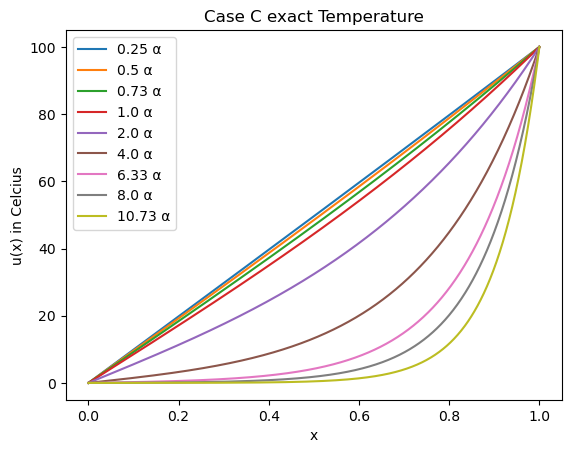

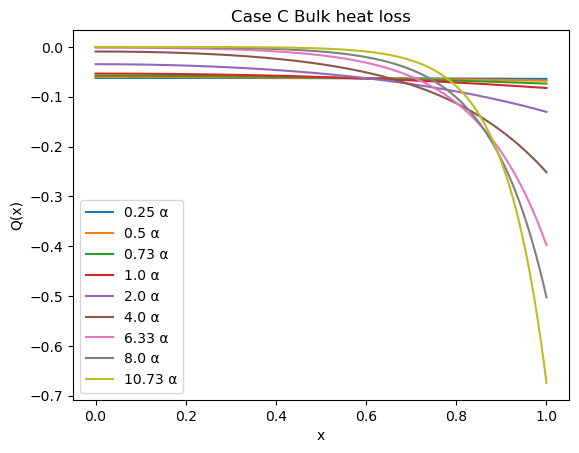

In [32]:
#### graphing
for i in alpha_list:
    plt.plot(x_list, u(i,x_list), label='' + str(i) + ' \u03B1')
plt.title('Case C exact Temperature')
plt.xlabel('x')
plt.ylabel('u(x) in Celcius')
plt.legend()
plt.show()

for i in alpha_list:
    plt.plot(x_list, Q(i,x_list), label='' + str(i) + ' \u03B1')
plt.title('Case C Bulk heat loss')
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.legend()
plt.show()

In [48]:
'''#### Starting from the maple solution
K = Matrix([(h*P*u_0*sp.exp(-alpha) + 100*alpha)/((sp.exp(alpha) + sp.exp(-alpha))*alpha), -(sp.exp(alpha)*h*P*u_0 - 100*alpha)/((sp.exp(alpha) + sp.exp(-alpha))*alpha)])
A = sp.trigsimp(K[0])
B = sp.trigsimp(K[1])
displayEquations('A',A)
displayEquations('B',B)
u_exact = A*sp.exp(alpha*x) + B*sp.exp(-alpha*x)
eqn1 = u_exact.subs({x:1}) - 100
u_sol = sp.solve(eqn1,u_0)
displayEquations('u_sol',u_sol)
u_exact = u_exact.subs({u_sol})
displayEquations('u_exact',u_exact)
Q_exact = u_exact.diff(x)
displayEquations('Q_exact',Q_exact)
#### graphing
u_exact = lambdify([alpha,x], u_exact)
Q_exact = lambdify([alpha,x], Q_exact)
for i in alpha_list:
    plt.plot(x_list, u_exact(i,x_list), label='' + str(i) + ' \u03B1')
plt.title('Case C exact Temperature')
plt.xlabel('x')
plt.ylabel('u(x) in Celcius')
plt.legend()
plt.show()

for i in alpha_list:
    plt.plot(x_list, Q_exact(i,x_list), label='' + str(i) + ' \u03B1')
plt.title('Case C Bulk heat loss')
plt.xlabel('x')
plt.ylabel('Q(x)')
plt.legend()
plt.show()'''

"#### Starting from the maple solution\nK = Matrix([(h*P*u_0*sp.exp(-alpha) + 100*alpha)/((sp.exp(alpha) + sp.exp(-alpha))*alpha), -(sp.exp(alpha)*h*P*u_0 - 100*alpha)/((sp.exp(alpha) + sp.exp(-alpha))*alpha)])\nA = sp.trigsimp(K[0])\nB = sp.trigsimp(K[1])\ndisplayEquations('A',A)\ndisplayEquations('B',B)\nu_exact = A*sp.exp(alpha*x) + B*sp.exp(-alpha*x)\neqn1 = u_exact.subs({x:1}) - 100\nu_sol = sp.solve(eqn1,u_0)\ndisplayEquations('u_sol',u_sol)\nu_exact = u_exact.subs({u_sol})\ndisplayEquations('u_exact',u_exact)\nQ_exact = u_exact.diff(x)\ndisplayEquations('Q_exact',Q_exact)\n#### graphing\nu_exact = lambdify([alpha,x], u_exact)\nQ_exact = lambdify([alpha,x], Q_exact)\nfor i in alpha_list:\n    plt.plot(x_list, u_exact(i,x_list), label='' + str(i) + ' α')\nplt.title('Case C exact Temperature')\nplt.xlabel('x')\nplt.ylabel('u(x) in Celcius')\nplt.legend()\nplt.show()\n\nfor i in alpha_list:\n    plt.plot(x_list, Q_exact(i,x_list), label='' + str(i) + ' α')\nplt.title('Case C Bulk he